## Initial data transformation and processing

In [2]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_array = sio.loadmat('data/DATASET.mat')['DATASET']

Original dataset has all variables as imaginary numbers, for most of them the imaginary part is zero. But for FFT variables imaginary part is non-zero.

We'll split variables with imaginary part in real and imaginary as separate variables. Then, all variables will be represented as floats.

In [4]:
# Get only real part
data_float = data_array.copy().real.astype(float)
# Get imaginary part
imaginary_L_FFT = data_array.imag[:, 597:797]
imaginary_R_FFT = data_array.imag[:, 797:997]
# Array with all variables as float (includding imaginary part as a separate variable)
all_float_array = np.hstack((data_float[:, :997], imaginary_L_FFT, imaginary_R_FFT, data_float[:, 997:]))

In [5]:
# Imaginary components are now separated
print 'original dataset shape:', data_array.shape
print 'all floats dataset shape:', all_float_array.shape

original dataset shape: (65600, 1039)
all floats dataset shape: (65600, 1439)


Now we will include feature names:

In [16]:
def define_column_names():
    column_names = []
    # Time series
    for i in range(200):
        column_names.append('L_HRIR_{:d}'.format(i))
    for i in range(200):
        column_names.append('R_HRIR_{:d}'.format(i))

    # Frequency Series
    for i in range(98):
        column_names.append('L_HRTF_{:d}'.format(i))
    for i in range(98):
        column_names.append('R_HRTF_{:d}'.format(i))

    # Complex Response
    for i in range(200):
        column_names.append('L_FFT_real_{:d}'.format(i))
    for i in range(200):
        column_names.append('R_HRIR_real_{:d}'.format(i))
    for i in range(200):
        column_names.append('L_FFT_imag_{:d}'.format(i))
    for i in range(200):
        column_names.append('R_HRIR_imag_{:d}'.format(i))
    # Interaction Parameters
    # Time-arrival Difference
    column_names.append('ITD')
    # Intensity Difference
    column_names.append('IID')
    # Spectral Difference
    column_names.append('DS')
    # Head Parameters
    column_names.append('head_width')
    column_names.append('head_height')
    column_names.append('head_depth')
    column_names.append('pinna_offset_down')
    column_names.append('pinna_offset_back')
    column_names.append('neck_width')
    column_names.append('neck_height')
    column_names.append('neck_depth')
    column_names.append('torso_top_width')
    column_names.append('torso_top_heigth')
    column_names.append('torso_top_depth')
    column_names.append('shoulder_width')
    column_names.append('head_offset_forward')
    column_names.append('height')
    column_names.append('seated_height')
    column_names.append('head_circumference ')
    column_names.append('shoulder_circumference')

    # Ear Parameters
    column_names.append('L_cavum_concha_heigth')
    column_names.append('L_cymba_concha_heigth')
    column_names.append('L_cavum_concha_width')
    column_names.append('L_fossa_height')
    column_names.append('L_pinna_height')
    column_names.append('L_pinna_width')
    column_names.append('L_intertragal_incisure_width')
    column_names.append('L_cavum_concha_depth')
    column_names.append('R_cavum_concha_heigth')
    column_names.append('R_cymba_concha_heigth')
    column_names.append('R_cavum_concha_width')
    column_names.append('R_fossa_height')
    column_names.append('R_pinna_height')
    column_names.append('R_pinna_width')
    column_names.append('R_intertragaR_incisure_width')
    column_names.append('R_cavum_concha_depth')

    # Pinnae Rotation Parameters
    column_names.append('L_pinna_rotation_angle')
    column_names.append('L_pinna_flare_angle')
    column_names.append('R_pinna_rotation_angle')
    column_names.append('R_pinna_flare_angle')

    # Target
    column_names.append('azimuth')
    column_names.append('elevation')

    # Subject Id
    column_names.append('subject_id')
    return column_names

In [17]:
column_names = define_column_names()

In [18]:
# Build Pandas DataFrame
df = pd.DataFrame(all_float_array, columns=column_names)

In [40]:
# col_ix Dictionary can be used to get the index of any feature
col_ix = {}
for i, col in enumerate(df.columns):
    col_ix[col] = i

In [20]:
# Should match the number of colums in dataset
len(column_names)

1439

In [21]:
# Number of unique azimuth, elevation and subject_id values
print 'azimuth: \nunique', df.azimuth.nunique(), '\n', df.azimuth.describe().transpose()
print 'elevation: \n unique', df.elevation.nunique(), df.elevation.describe().transpose()
print 'subject_id:', df.subject_id.nunique()

azimuth: 
unique 60 
count    65600.000000
mean        -4.321646
std        107.656501
min       -180.000000
25%       -100.000000
50%         -0.000000
75%         80.000000
max        175.000000
Name: azimuth, dtype: float64
elevation: 
 unique 32 count    65600.000000
mean        17.841797
std         40.146042
min        -50.625000
25%        -16.875000
50%         16.875000
75%         50.625000
max         90.000000
Name: elevation, dtype: float64
subject_id: 95


Full dataset contains data from two original datasets.

For the moment we will work with the first dataset only.

In [22]:
ds_1 = df.ix[:56249].copy()
ds_1.shape

(56250, 1439)

In [23]:
# TOTAL Unique Subjects for dataset 1 = 45
ds_1.loc[:, ('subject_id')] = ds_1['subject_id'].astype(int)
ds_1.subject_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

## Inter-subject variation for same azimuth and elevation angles

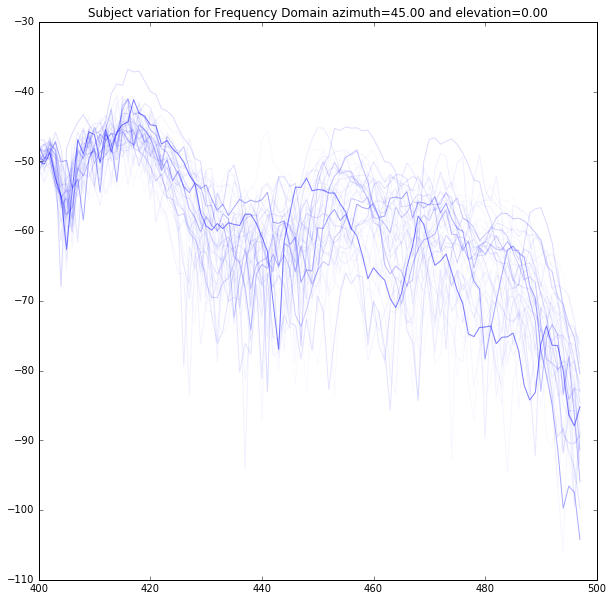

In [24]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 0.0 
location = ds_1[(ds_1.azimuth == azimuth) & (ds_1.elevation == elevation)]
range_ = range(400, 498)
l_hrtf = location.iloc[:,range_]
r_hrtf = location.iloc[:, range_]
j = 1
for i in range(1, 45):
    first = l_hrtf[location.subject_id == i].iloc[0]
    plt.plot(range_, first, c='b', alpha=1.0/(j+1))
    j += 1
#plt.legend(loc='upper right')
plt.title('Subject variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

In [25]:
# Analayzing non-HRTF features (extracted features)
# Some of them seem to be missing
ds_1.ix[:, 1399:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
head_width,46250.0,14.428826,0.905161,12.646597,13.903307,14.443268,14.892092,16.203902
head_height,46250.0,21.377795,1.161957,18.865526,20.665188,21.311794,22.090244,23.842658
head_depth,46250.0,19.900724,1.312059,16.660570,19.275830,19.915320,20.870571,23.064239
pinna_offset_down,46250.0,3.006494,0.586056,1.408322,2.446867,3.220209,3.469709,3.772236
pinna_offset_back,46250.0,0.389666,0.590552,-1.170696,0.167971,0.393765,0.785692,1.899457
neck_width,46250.0,11.518612,0.997720,9.408768,11.020129,11.549176,12.212968,14.042607
neck_height,46250.0,6.177656,1.972471,1.905978,4.982187,6.340924,7.461400,10.600237
neck_depth,46250.0,10.477648,1.134602,7.837414,9.936521,10.372081,11.325472,12.534256
torso_top_width,46250.0,30.953683,2.606181,25.202642,29.566625,31.213773,32.422859,36.839476
torso_top_heigth,46250.0,13.429684,1.939632,9.412423,12.236193,13.005980,14.494436,17.560892


In [26]:
df.elevation.unique()

array([-45.   , -39.375, -33.75 , -28.125, -22.5  , -16.875, -11.25 ,
        -5.625,   0.   ,   5.625,  11.25 ,  16.875,  22.5  ,  28.125,
        33.75 ,  39.375,  45.   ,  50.625,  56.25 ,  61.875,  67.5  ,
        73.125,  78.75 ,  84.375,  90.   , -50.625, -30.   , -15.   ,
        15.   ,  30.   ,  60.   ,  75.   ])

Frequency series for subjects in Training and Test Sets

## Baseline Regression Tree model
### Dataset split
- training: 75%
- validation: 10%
- test: 15%

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error
from math import ceil

In [28]:
def split_dataset(n, training_perc=0.75, val_perc=0.1):
    train_size = int(ceil(n*training_perc))
    val_size = int(ceil(n*val_perc))
    shuffled_ix = np.random.choice(range(1, n+1), n, replace=False)
    return shuffled_ix[:train_size], shuffled_ix[train_size:train_size + val_size], shuffled_ix[train_size + val_size:]

In [29]:
# Fit regression model
# Only use this columns for the moment
cols_range = range(0, 1399) + range(-3, 0, 1)
ds_1 = ds_1.ix[:, cols_range]
n = 45

In [ ]:
#train_ix, val_ix, test_ix = split_dataset(n)
#train_ix.sort()
#val_ix.sort()
#test_ix.sort()
#print 'chosen training subjects:', train_ix
#print 'chosen validation subjects:', val_ix
#print 'chosen test subjects:', test_ix

From now on, chosen users will be used for each dataset (trainig, validation and testing)

In [30]:
def get_splitted_dataset(ds):
    train_ix = [2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 22, 23,
                25, 26, 27, 28, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44]
    val_ix = [7, 24, 29, 30, 38]
    test_ix = [1, 12, 20, 21, 32, 45]

    train = ds[ds.subject_id.isin(train_ix)]
    val = ds[ds.subject_id.isin(val_ix)]
    test = ds[ds.subject_id.isin(test_ix)]
    return train, val, test

In [31]:
train, val, test = get_splitted_dataset(ds_1)

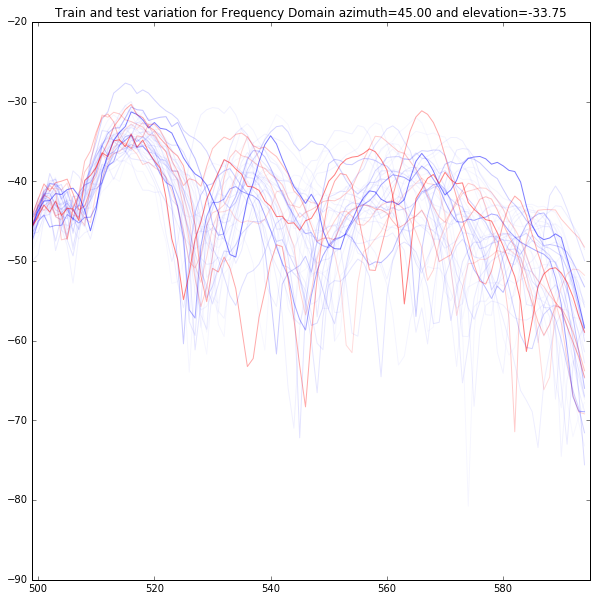

In [32]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, -33.75
range_ = range(499, 595)
train_location = train[((train.azimuth == azimuth) & (train.elevation == elevation))]
test_location = test[((test.azimuth == azimuth) & (test.elevation == elevation))]
l_hrtf = train_location.ix[:, range_]
l_hrtf_test = test_location.ix[:, range_]
j = 1
for i in train.subject_id.unique():
    subj_train = l_hrtf[train_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_train, c='b', alpha=1.0/(j+1))
    j += 1
j = 1
for i in test.subject_id.unique():
    subj_test = l_hrtf_test[test_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_test, c='r', alpha=1.0/(j+1))
    j += 1
plt.xlim(499, 595)
plt.title('Train and test variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

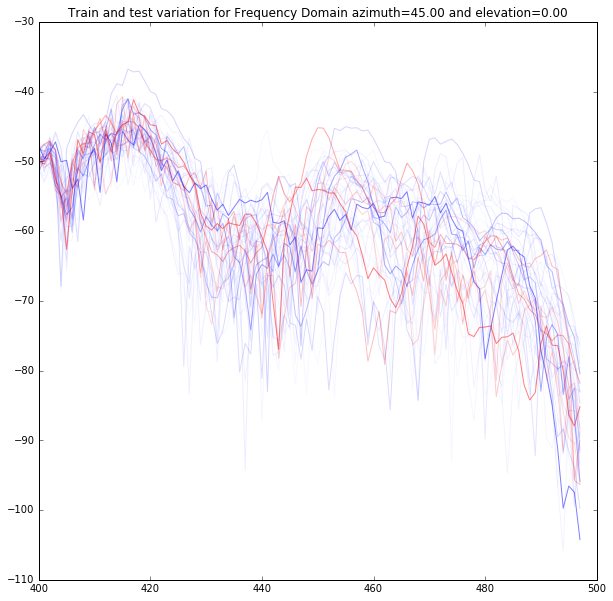

In [33]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 0.0
range_ = range(400, 498)
train_location = train[((train.azimuth == azimuth) & (train.elevation == elevation))]
test_location = test[((test.azimuth == azimuth) & (test.elevation == elevation))]
l_hrtf = train_location.ix[:, range_]
l_hrtf_test = test_location.ix[:, range_]
j = 1
for i in train.subject_id.unique():
    subj_train = l_hrtf[train_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_train, c='b', alpha=1.0/(j+1))
    j += 1
j = 1
for i in test.subject_id.unique():
    subj_test = l_hrtf_test[test_location.subject_id == i].iloc[0]
    plt.plot(range_, subj_test, c='r', alpha=1.0/(j+1))
    j += 1
plt.title('Train and test variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

### Building baseline models for Elevation

In [75]:
def separate_target(train, val, test, target='elevation'):
    X_train, y_train = train.ix[:, :-3], train.ix[:, target]
    X_val, y_val = train.ix[:, :-3], train.ix[:, target]
    X_test, y_test = test.ix[:, :-3], test.ix[:, target]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [76]:
X_train, y_train, X_val, y_val, X_test, y_test = separate_target(train, val, test, target='elevation')
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(42500, 1448) (42500,)
(7500, 1448) (7500,)


In [36]:
# Regression Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth = 15
regr = DecisionTreeRegressor(max_depth=depth)
regr.fit(X_train, y_train)
with open('tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

15.6298413447


In [47]:
# Predict on training data
y_pred_train = regr.predict(X_train)
loss_train = mean_absolute_error(y_train, y_pred_train)
# Predict on test data
y_pred = regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print 'train', loss_train
print 'test', loss

train 3.43964395965
test 15.6298413447


In [37]:
# Number of possible outcomes in built tree, comparte to 32 unique values of elevation
pd.Series(y_pred).nunique()

604

In [38]:
# Build dataframe to compare real values with predictions on test set
new_df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), test.ix[:, -3:]], axis=1)
new_df.to_csv('results.csv')

In [39]:
# Classification Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth=15
c_tree = DecisionTreeClassifier(max_depth=depth)
c_tree.fit(X_train, y_train.astype(np.str))

with open('class_tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

# Predict
y_pred = c_tree.predict(X_test).astype(np.float64)
loss = mean_absolute_error(y_test, y_pred)

print loss

16.4265


In [42]:
# Build dataframe to compare real values with predictions on test set
new_df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), test.ix[:, -3:]], axis=1)
new_df.to_csv('results_class.csv')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regr = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_regr.fit(X_train, y_train)
# Predict
y_pred = knn_regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print loss

## Include all features

In [43]:
# Include all features
ds_2 = df.ix[:56249].copy()
n = 45

# Substitute missing values with feature mean
means = ds_2.mean(axis=0)
ds_2 = ds_2.fillna(means)

In [122]:
ds_2.ix[:, 1400:].corr()

,head_height,head_depth,pinna_offset_down,pinna_offset_back,neck_width,neck_height,neck_depth,torso_top_width,torso_top_heigth,torso_top_depth,...,R_pinna_width,R_intertragaR_incisure_width,R_cavum_concha_depth,L_pinna_rotation_angle,L_pinna_flare_angle,R_pinna_rotation_angle,R_pinna_flare_angle,azimuth,elevation,subject_id
head_height,1.000000e+00,1.842481e-01,-6.385763e-01,8.882663e-02,8.732869e-02,-3.451416e-01,2.045436e-01,1.336955e-01,2.550893e-01,-3.351703e-02,...,-1.302895e-01,2.492865e-01,1.233669e-01,-3.519513e-01,2.363218e-01,-1.326700e-01,-3.324058e-02,-7.470190e-18,-8.256199e-19,0.117582
head_depth,1.842481e-01,1.000000e+00,1.598395e-01,-2.553536e-02,7.898622e-01,1.153748e-02,6.139347e-01,6.092705e-01,3.692032e-01,2.081729e-01,...,6.895540e-02,2.685228e-01,2.487681e-01,2.828970e-01,1.891958e-01,2.347584e-01,1.043760e-01,-9.170204e-19,-3.217137e-18,0.201577
pinna_offset_down,-6.385763e-01,1.598395e-01,1.000000e+00,-9.997747e-02,3.388669e-01,3.557180e-01,6.577611e-02,2.077020e-01,1.341603e-01,2.452817e-01,...,9.838847e-02,-2.326790e-01,-5.345259e-02,4.524114e-01,-2.086302e-02,3.491461e-01,9.977637e-02,-2.574576e-18,1.309548e-18,0.095901
pinna_offset_back,8.882663e-02,-2.553536e-02,-9.997747e-02,1.000000e+00,6.352171e-02,1.068069e-01,1.324540e-02,4.141404e-02,-7.844554e-02,6.426975e-03,...,-2.513780e-01,-1.854356e-01,-1.965202e-01,1.754155e-01,1.464398e-01,1.461092e-01,3.267033e-02,-8.080953e-19,4.341111e-18,-0.113966
neck_width,8.732869e-02,7.898622e-01,3.388669e-01,6.352171e-02,1.000000e+00,3.500948e-02,7.143985e-01,7.446531e-01,4.470211e-01,3.317839e-01,...,4.712621e-02,1.271349e-01,2.389647e-01,3.897471e-01,8.698006e-02,3.137775e-01,-2.993087e-02,-4.045674e-18,-2.324835e-18,0.155747
neck_height,-3.451416e-01,1.153748e-02,3.557180e-01,1.068069e-01,3.500948e-02,1.000000e+00,1.640978e-02,1.765484e-01,3.462315e-02,8.934299e-02,...,-9.499337e-02,-8.284328e-02,-1.034541e-01,1.904835e-01,-9.586775e-03,1.496358e-01,1.895268e-01,1.982483e-19,-5.878030e-18,-0.080526
neck_depth,2.045436e-01,6.139347e-01,6.577611e-02,1.324540e-02,7.143985e-01,1.640978e-02,1.000000e+00,6.254821e-01,3.586998e-01,3.977938e-01,...,9.075468e-02,2.041470e-01,3.150074e-02,9.961444e-02,-2.464357e-02,9.518446e-02,-1.517896e-01,6.344253e-18,3.080126e-18,0.209456
torso_top_width,1.336955e-01,6.092705e-01,2.077020e-01,4.141404e-02,7.446531e-01,1.765484e-01,6.254821e-01,1.000000e+00,4.791006e-01,3.684965e-01,...,1.402572e-01,4.687847e-03,6.477917e-02,4.096489e-01,1.251606e-02,4.200237e-01,-1.154387e-01,-1.203107e-17,-2.907988e-18,0.029671
torso_top_heigth,2.550893e-01,3.692032e-01,1.341603e-01,-7.844554e-02,4.470211e-01,3.462315e-02,3.586998e-01,4.791006e-01,1.000000e+00,4.832270e-01,...,6.829363e-02,-1.267116e-01,2.202732e-01,3.117152e-01,9.356872e-02,1.464268e-01,-1.666356e-02,2.283970e-18,4.451366e-19,-0.118021
torso_top_depth,-3.351703e-02,2.081729e-01,2.452817e-01,6.426975e-03,3.317839e-01,8.934299e-02,3.977938e-01,3.684965e-01,4.832270e-01,1.000000e+00,...,2.758810e-01,-1.863762e-01,1.664038e-01,1.393406e-01,-4.355427e-02,-9.844526e-04,-9.662204e-02,1.385018e-18,-5.275669e-18,-0.139906


In [44]:
train, val, test = get_splitted_dataset(ds_2)

In [45]:
# Write .csv for each set
train.to_csv('data/d2_train.csv')
val.to_csv('data/d2_val.csv')
test.to_csv('data/d2_test.csv')

In [46]:
print train.shape, val.shape, test.shape

(42500, 1439) (6250, 1439) (7500, 1439)


In [ ]:
hrtfs = test[test['subject_id'] == 1].iloc[:, range(400, 498)].transpose()
hrtfs.columns = test[test['subject_id'] == 1]['azimuth'].astype(np.str) + test[test['subject_id'] == 1]['elevation'].astype(np.str)

In [ ]:
hrtfs = hrtfs.iloc[:, range(0, 1250, 5)]
hrtfs.to_csv('hrtfs.csv')

## Include some additional features

In [85]:
# Include all features
ds = ds_2.copy()
ds_3 = ds_2.copy()
n = 45

sides = ['L', 'R']
features = ['HRIR', 'HRTF']
features_length = [200, 98]

ds_3.drop('elevation', axis=1, inplace=True)
ds_3.drop('azimuth', axis=1, inplace=True)
ds_3.drop('subject_id', axis=1, inplace=True)

for i, feature in enumerate(features):
    for side in sides:
        feature_name = side + '_' + feature
        feature_name_first = feature_name + '_0'
        range_feature = range(col_ix[feature_name_first], col_ix[feature_name_first] + features_length[i])
        min_summ = ds_3.ix[:, range_feature].min(axis=1)
        max_summ = ds_3.ix[:, range_feature].max(axis=1)
        mean_summ = ds_3.ix[:, range_feature].mean(axis=1)
        ds_3[feature_name + '_min'] = min_summ
        ds_3[feature_name + '_max'] = max_summ
        ds_3[feature_name + '_mean'] = mean_summ
        
ds_3['elevation'] = ds['elevation']
ds_3['azimuth'] = ds['azimuth']
ds_3['subject_id'] = ds['subject_id']

ds_3.ix[:, -15:].corr()

,L_HRIR_min,L_HRIR_max,L_HRIR_mean,R_HRIR_min,R_HRIR_max,R_HRIR_mean,L_HRTF_min,L_HRTF_max,L_HRTF_mean,R_HRTF_min,R_HRTF_max,R_HRTF_mean,elevation,azimuth,subject_id
L_HRIR_min,1.000000,-0.807259,-0.003015,-0.577965,0.642880,0.288895,-0.612829,-0.818678,-0.824560,0.632229,0.662356,0.691063,-0.108868,0.593286,0.040338
L_HRIR_max,-0.807259,1.000000,-0.121227,0.647182,-0.596078,-0.438715,0.601979,0.710853,0.781145,-0.706694,-0.803466,-0.806303,-0.095106,-0.674137,-0.014076
L_HRIR_mean,-0.003015,-0.121227,1.000000,0.186443,-0.324182,0.837782,0.209213,0.311296,0.261248,-0.029785,0.127534,0.024849,0.187571,-0.057557,-0.022868
R_HRIR_min,-0.577965,0.647182,0.186443,1.000000,-0.802116,-0.123284,0.557740,0.660562,0.684334,-0.715306,-0.813894,-0.826681,-0.115765,-0.557336,-0.005584
R_HRIR_max,0.642880,-0.596078,-0.324182,-0.802116,1.000000,0.020802,-0.630826,-0.797702,-0.791476,0.700587,0.710247,0.791683,-0.097351,0.617118,0.006112
R_HRIR_mean,0.288895,-0.438715,0.837782,-0.123284,0.020802,1.000000,-0.063091,-0.015464,-0.081231,0.261581,0.427419,0.348810,0.176708,0.249798,-0.053436
L_HRTF_min,-0.612829,0.601979,0.209213,0.557740,-0.630826,-0.063091,1.000000,0.701990,0.799943,-0.421378,-0.519727,-0.558038,-0.000309,-0.488099,-0.004491
L_HRTF_max,-0.818678,0.710853,0.311296,0.660562,-0.797702,-0.015464,0.701990,1.000000,0.927743,-0.624981,-0.560900,-0.661865,0.065285,-0.585160,-0.049665
L_HRTF_mean,-0.824560,0.781145,0.261248,0.684334,-0.791476,-0.081231,0.799943,0.927743,1.000000,-0.637819,-0.641580,-0.695911,0.031920,-0.621174,-0.020488
R_HRTF_min,0.632229,-0.706694,-0.029785,-0.715306,0.700587,0.261581,-0.421378,-0.624981,-0.637819,1.000000,0.776827,0.871671,-0.005242,0.571811,0.019257


In [120]:
train, val, test = get_splitted_dataset(ds_3)

In [121]:
# Write .csv for each set
train.to_csv('data/d3_train.csv')
val.to_csv('data/d3_val.csv')
test.to_csv('data/d3_test.csv')

In [87]:
print train.shape, val.shape, test.shape
X_train, y_train, X_val, y_val, X_test, y_test = separate_target(train, val, test, target='elevation')

(42500, 1451) (6250, 1451) (7500, 1451)


In [88]:
# Regression Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth = 15
regr = DecisionTreeRegressor(max_depth=depth)
regr.fit(X_train, y_train)
with open('tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

In [89]:
# Predict on training data
y_pred_train = regr.predict(X_train)
loss_train = mean_absolute_error(y_train, y_pred_train)
# Predict on test data
y_pred = regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print 'train', loss_train
print 'test', loss

train 3.36371204151
test 15.6278284747


In [108]:
importances = pd.Series(regr.feature_importances_, index=ds_3.columns[:-3])

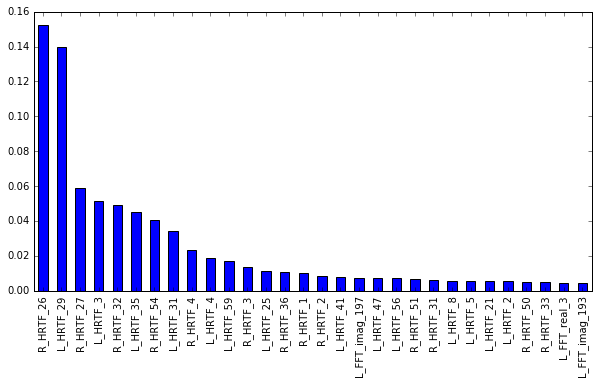

In [114]:
# More informative features
importances.sort_values(ascending=False, inplace=True)
importances[:30].plot(kind='bar', figsize=(10,5))

In [119]:
# Less informative features
importances.sort_values(ascending=True, inplace=True)
importances[:40]

L_HRIR_0           0.000000e+00
R_HRIR_2           0.000000e+00
L_FFT_imag_54      0.000000e+00
L_FFT_imag_128     0.000000e+00
ITD                0.000000e+00
R_HRIR_imag_171    0.000000e+00
R_HRIR_0           0.000000e+00
L_FFT_imag_66      0.000000e+00
L_FFT_real_133     0.000000e+00
L_FFT_real_84      0.000000e+00
R_HRIR_imag_100    0.000000e+00
R_HRIR_imag_50     0.000000e+00
R_HRIR_1           0.000000e+00
R_HRIR_real_85     0.000000e+00
L_FFT_real_51      0.000000e+00
L_FFT_imag_168     0.000000e+00
R_HRIR_imag_55     0.000000e+00
R_HRIR_real_25     0.000000e+00
seated_height      0.000000e+00
R_HRIR_imag_0      0.000000e+00
L_FFT_real_105     0.000000e+00
torso_top_width    0.000000e+00
R_HRIR_real_19     0.000000e+00
L_HRIR_5           0.000000e+00
R_HRIR_real_53     0.000000e+00
L_FFT_real_56      0.000000e+00
L_FFT_imag_139     0.000000e+00
L_FFT_imag_148     0.000000e+00
L_FFT_imag_180     0.000000e+00
L_FFT_imag_178     0.000000e+00
L_HRIR_2           0.000000e+00
L_FFT_im

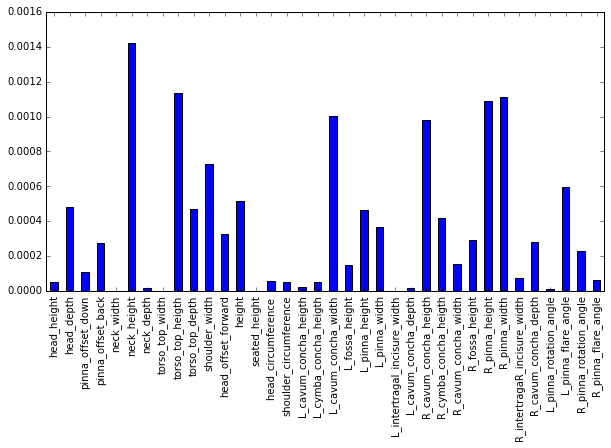

In [124]:
importances[ds.columns[1400:-3]].plot(kind='bar', figsize=(10,5))